# Time-series Forecasting

## Description
The data consists of 52,416 observations of energy consumption on a 10-minute window. Every observation is described by the following feature columns.

Your task is to **aggregate the observations on an interval of 2 hours**. For this time interval, using the values of the **4 previous time intervals**, forecast the target value one step in the future. Choose which features you are going to use.

**You must train a Boosting model for the task. Choose the model based on the number, and type of features available.**



Features:

* Date: Time window of ten minutes.
* Temperature: Weather Temperature.
* Humidity: Weather Humidity.
* WindSpeed: Wind Speed.
* GeneralDiffuseFlows: “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
* DiffuseFlows

Target:

SolarPower

## Dataset links:
* [DS1](https://drive.google.com/file/d/1-Pcpb1xWpKc8Cgs-P7xqBFHw2NM0dBsA/view?usp=sharing)
* [DS2](https://drive.google.com/file/d/1-Pul07w6LXpm-uo99qbNc86FHhwl4yQD/view?usp=sharing)

## Read the datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [4]:
data1 = pd.read_csv('power_consumption_g3_feat.csv')
data1.head(5)

,Date,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300
1,2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630
2,2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322
3,2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111
4,2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900


In [5]:
data2 = pd.read_csv('power_consumption_g3.csv')
data2.head(5)

,Date,SolarPower
0,2017-06-22 11:50:00,35818.80795
1,2017-04-24 22:50:00,34628.20237
2,2017-11-05 09:00:00,22781.53846
3,2017-10-19 23:20:00,31925.77681
4,2017-03-25 17:10:00,30246.12766


## Merge the datasets (and pre-processing if needed)

In [7]:
data1['Date'] = pd.to_datetime(data1['Date'])
data2['Date'] = pd.to_datetime(data2['Date'])

In [8]:
#sortirame spored Date
data1.set_index(keys=['Date'],inplace=True)
data2.set_index(keys=['Date'],inplace=True)

data1.sort_index(inplace=True)
data2.sort_index(inplace=True) 

In [9]:
data = pd.merge(left=data1,right=data2,right_index=True,left_index=True)
data.head(5)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620


In [10]:
data.isnull().sum()

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
SolarPower               0
dtype: int64

In [11]:
#ima missing values na sredina - interpolacija
def interpolate_data(data,columns):
    data_copy = data.copy()
    for col in columns:
        data_copy[col] = data_copy[col].interpolate(method="linear")
    return data_copy

In [12]:
data = interpolate_data(data,['Temperature','Humidity','WindSpeed','GeneralDiffuseFlows','DiffuseFlows'])
data.head(5)
                

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620


In [13]:
data.isnull().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
SolarPower             0
dtype: int64

## Group the datasets into time intervals of 2 hours

In [15]:
data = data.groupby(pd.Grouper(freq="2H")).mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_664\760477289.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.groupby(pd.Grouper(freq="2H")).mean()


In [16]:
data.head(10)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872
2017-01-01 10:00:00,8.019333,63.835833,2.913333,350.887500,34.108333,27986.835442
2017-01-01 12:00:00,15.263333,57.075000,0.076167,486.391667,40.981667,30060.759495
2017-01-01 14:00:00,15.662500,56.914167,0.075667,377.458333,48.125000,29558.481012
2017-01-01 16:00:00,15.309167,59.112500,0.077250,160.075833,169.773333,31576.708860


<Axes: >

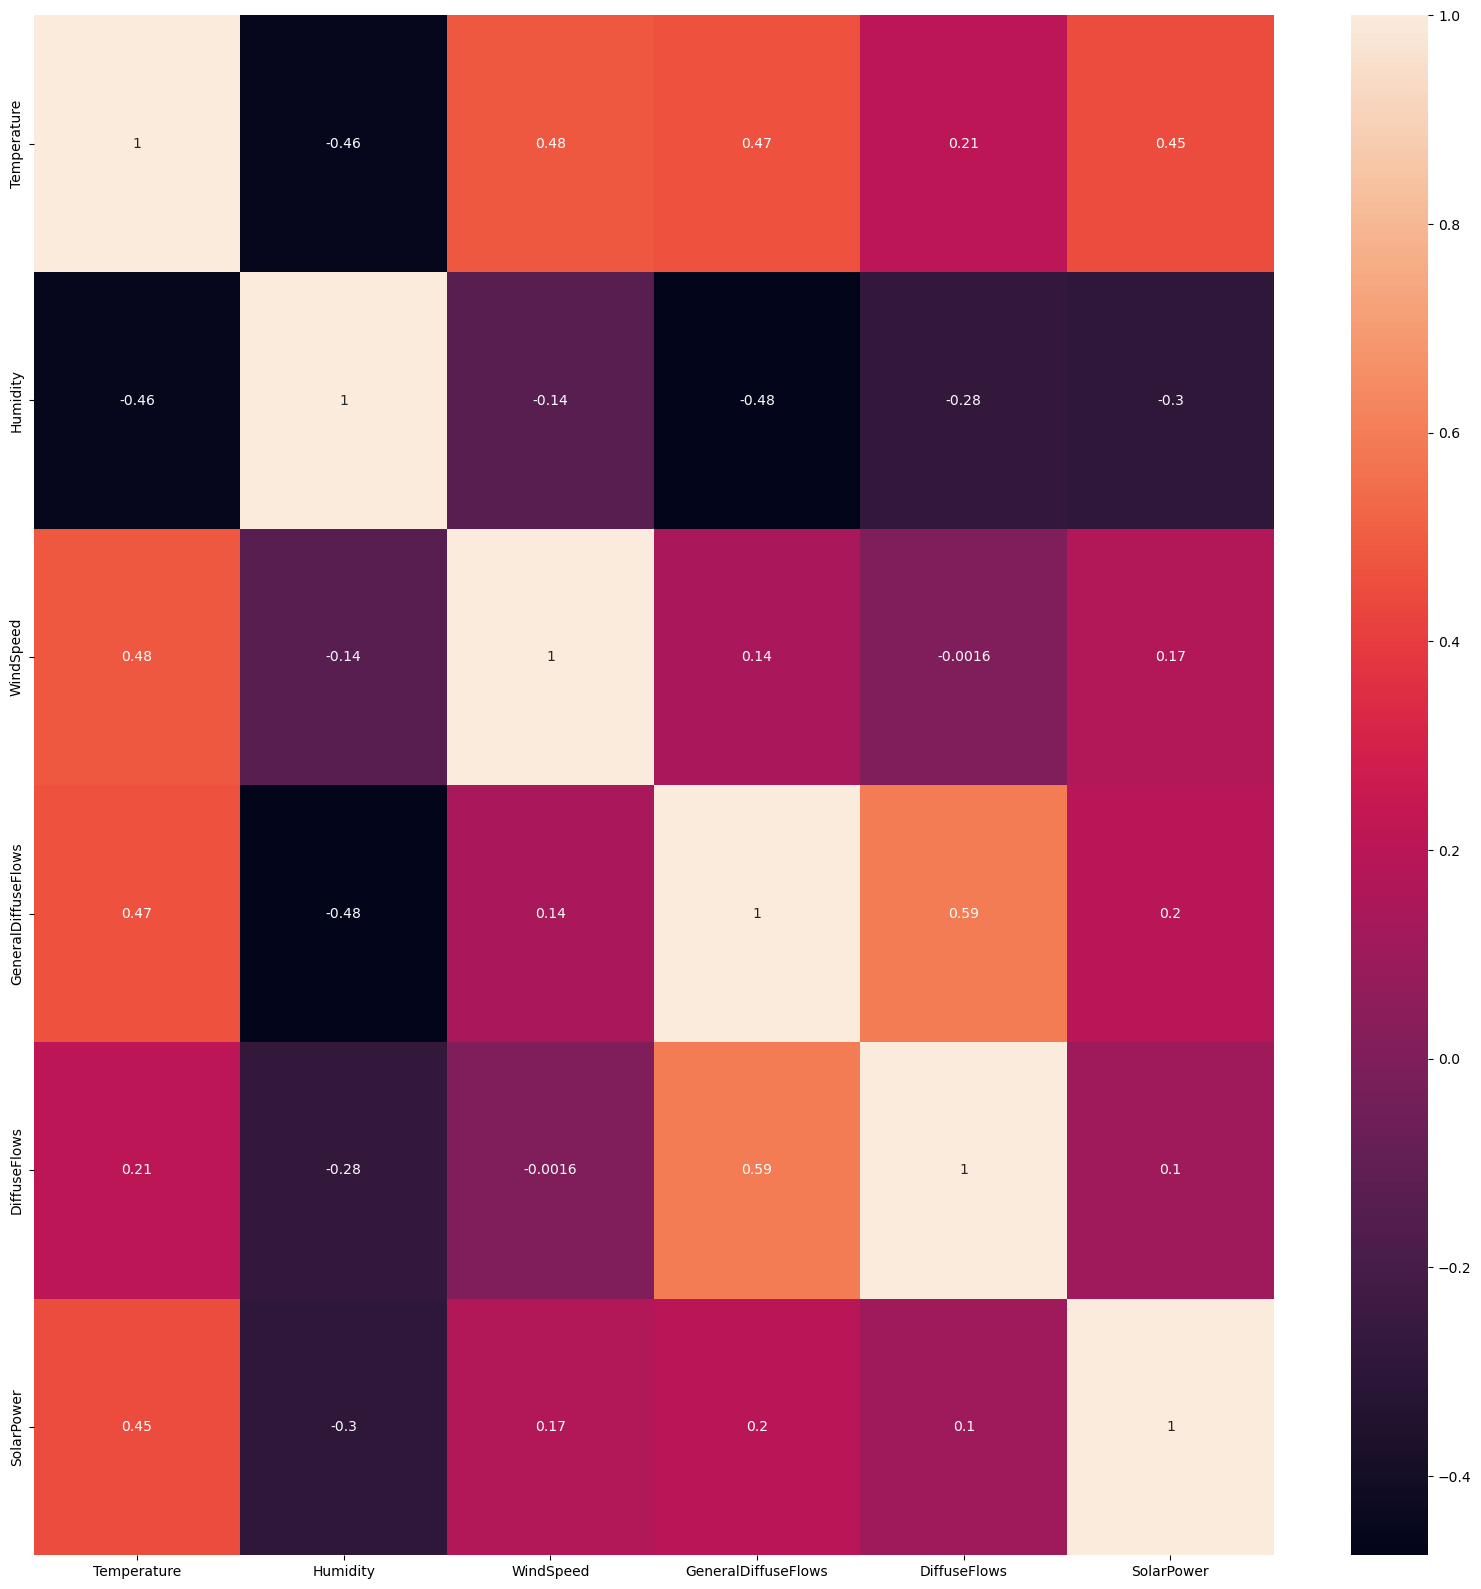

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

## Create lags

In [19]:
columns_for_lags = data.columns
for feature in columns_for_lags:
    for lag in range(1,5):
        data[f'{feature}_lag_{lag}']=data[feature].shift(lag)

In [20]:
data = data.dropna()
data.head(5)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower,Temperature_lag_1,Temperature_lag_2,Temperature_lag_3,Temperature_lag_4,...,GeneralDiffuseFlows_lag_3,GeneralDiffuseFlows_lag_4,DiffuseFlows_lag_1,DiffuseFlows_lag_2,DiffuseFlows_lag_3,DiffuseFlows_lag_4,SolarPower_lag_1,SolarPower_lag_2,SolarPower_lag_3,SolarPower_lag_4
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,4.512750,4.919667,5.029333,5.866833,...,0.061417,0.060167,0.122500,0.120833,0.135083,0.105667,20094.683545,20641.518987,21447.088607,26927.594937
2017-01-01 10:00:00,8.019333,63.835833,2.913333,350.887500,34.108333,27986.835442,4.632167,4.512750,4.919667,5.029333,...,0.061917,0.061417,15.761833,0.122500,0.120833,0.135083,21255.189872,20094.683545,20641.518987,21447.088607
2017-01-01 12:00:00,15.263333,57.075000,0.076167,486.391667,40.981667,30060.759495,8.019333,4.632167,4.512750,4.919667,...,0.063583,0.061917,34.108333,15.761833,0.122500,0.120833,27986.835442,21255.189872,20094.683545,20641.518987
2017-01-01 14:00:00,15.662500,56.914167,0.075667,377.458333,48.125000,29558.481012,15.263333,8.019333,4.632167,4.512750,...,79.281917,0.063583,40.981667,34.108333,15.761833,0.122500,30060.759495,27986.835442,21255.189872,20094.683545
2017-01-01 16:00:00,15.309167,59.112500,0.077250,160.075833,169.773333,31576.708860,15.662500,15.263333,8.019333,4.632167,...,350.887500,79.281917,48.125000,40.981667,34.108333,15.761833,29558.481012,30060.759495,27986.835442,21255.189872


# Split the dataset into 80% training and 20% testing datasets

In [22]:
from sklearn.model_selection import train_test_split
data_new = data.drop('SolarPower',axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(data_new,data['SolarPower'],test_size=0.2,shuffle=False)

## Create the model, pre-process the data and make it suitable for training

In [24]:
#xgbregressor
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import r2_score 
r2_score(Y_test,y_pred)

0.9139013718719464

## Perofrm hyper-parameter optimization with a 5-fold cross validation.

Important: Do not use many values for the hyper-parameters due to time constraints.

KEEP IN MIND THE DATASET IS TIME-SERIES.

In [28]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from xgboost import XGBRegressor
model1 = XGBRegressor()
param_grid={
    'max_depth':[8,10,6,12],
    'n_estimators':[20,50,60],
    'learning_rate':[0.1,0.01]
}
tsplits=TimeSeriesSplit(n_splits=5)
gs = GridSearchCV(estimator=model1,param_grid=param_grid,verbose=1,n_jobs=-1,cv=tsplits,scoring='r2')
gs.fit(X_train,Y_train)
print("Best parametars: ",gs.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parametars:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 60}


## Fit the model with the best parameters on the training dataset

In [55]:
best_model = gs.best_estimator_
best_model.fit(X_train,Y_train)
preds = best_model.predict(X_

NameError: name 'best_estimator_' is not defined

## Calculate the adequate metrics on the testing dataset

## Visualize the targets against the predictions